# Travail numérique de PHYS-F-302 
## Safae Ben Ayad & Guillaume Houyoux

## 1. Introduction & quelques équations

Pour ce travail, nous nous intéressons à un type d'écoulement, soit $\textbf{l'écoulement de Stokes}$. Plus concrétement, nous voudrons résoudre $\textbf{l'équation biharmonique}$ dans le but de résoudre numériquement l'écoulement de Stokes dans une cavité carrée.

$\textbf{L'écoulement de Stokes}$ s'agit d'un écoulement dont les effets dû à la force de viscosité du liquide sont très importants par rapport aux effets dûs à d'autres forces comme, par exemple, la force d'inertie. Un écoulement peut être supposé de Stokes dans un certain cadre; ce cadre est délimité par une condition sur le $\textbf{nombre de Reynolds (Re)}$ étant que, celui-ci, soit inférieur à 1. 

Le nombre de Reynolds, donné ci-dessous, représente le rapport entre les forces d'inertie et les forces visqueuses ce qui implique que un Re plus petit que 1 revient à notre énonciation précédente où nous affirmons que les écoulements de Stokes sont dominés par des forces dûes à la viscosité. 

$${\displaystyle \mathrm {Re} ={\frac {uL}{\nu }}}$$

où $\nu$ est la viscosité, $u$ la vitesse et $L$ une longueur caractéristique.

De plus, ce nombre permet de réecrire l'equation de $\textbf{Navier-Stokes}$ (sous l'hypothèse d'écoulement incompressible) qui suit comme étant une équation non dimensionnelle (1): 

 \begin{eqnarray}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u 
\end{eqnarray}


\begin{eqnarray} 
 Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*   \text{ (1)}
\end{eqnarray}

où  $u^*$ et $p^*$ sont les coefficients adimensionnels pour la vitesse et la pression respectivement.
  
Afin de trouver l'écoulement de Stokes, nous supposons que Re tend vers 0 de manière à retrouver l'équation suivante

\begin{equation}
 - \nabla p + \nabla^2 u = 0
\end{equation}

Et si nous appliquons le rotationnel des deux cotés, il en résulte: 

\begin{equation}
0 = \nabla \times 0 = \nabla \times \left( - \nabla p + \nabla^2 u\right)
\end{equation}

Sachant que le rotationnel du gradient d'un scalaire est nul, 
\begin{equation}
\nabla \times (- \nabla p) = - \nabla \times \nabla p = 0
\end{equation}

nous obtenons finalement l'équation suivante: 

\begin{equation}
 0 = \nabla \times \nabla^2 u =\nabla^2\omega
\end{equation}

en terme du vecteur tourbillon (vorticité) qui est donnée par $\omega = \nabla \times u$.

Donc nous avons tout simplement l'équation de Poisson dans le cas homogène, soit $\textbf{l'équation de Laplace}$: 

\begin{equation}
 \nabla ^2 \omega = 0
\end{equation}


Nous avons donc trouvé l'expression pour le tourbillon qui va ensuite nous servir pour trouver $\textbf{l'équation biharmonique}$. Trouvons à présent la formule pour le courant, nous nous plaçons tout d'abord dans le cas où l'écoulement est bidimensionnel et incompressible. Nous pouvons dire que par définition la fonction du courant sera donné par :


$$\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   et   } v = - \frac{\partial \psi}{\partial x}
\end{equation} $$

Sachant que le tourbillon suit l'axe z, les termes en x et y du rotationnel valent 0 et nous gardons plus que:

\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Nous trouvons donc la relation entre $\psi \text{ et } \omega $ en dérivant $\psi$ une deuxième fois par rapport aux deux coordonnées, nous égalisons avec l'expression d'omega; 

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

Par le calcul précédent sur le tourbillon, nous savons que $\nabla^2 \omega = 0$, donc nous faisons apparaître le $\nabla^2 \omega$ à droite de la manière suivante:

\begin{equation}
\boxed{\nabla^4 \psi= 0}
\end{equation}

pour finalement aboutir sur l'équation biharmonique souhaitée. Il s'agit de l'équation que nous allons résoudre durant ce travail.

### Écoulement dans une cavité - conditions aux bords 

<img src="./drivencavity.png" width=400px> 

**Note.** (Référence de l'image: lesson 05_05_Stokes.Flow from numerical-mooc).

Nous voudrons résoudre le problème du courant dans la cavité à couvercle mouvant afin d'examiner l'écoulement de Stokes.

Nous devons supposer pour ce problème que nous avons un couvercle qui se deplace à une vitesse constante $u=1$ et que le fluide ne dépasse pas la cavité à travers le bord du couvercle, autrement dit; nous avons imperméabilité des bords, le couvercle étant inclu. Nous supposons également que les parois sont non-glissantes.
Les conditions aux bord (C.B.) ci dessus sont toute données en terme de la fonction de courant $\psi$.
 
Sachant donc que le fluide ne sort pas de la cavité, les conditions de $\bf Dirichlet $ seront toutes nulles. En ce qui concerne les conditions de Neumann, nous savons que la parois supérieure a une vitesse égale à $u=1$ et en supposant que les parois sont non glissantes, le flot au long du couvercle aura lui aussi une vitesse constante égale à celle du couvercle. En ce qui concerne les autres bords, ils sont immobiles donc le flux parallèle le sera aussi.


## 2. Discretisation de l'équation biharmonique de second ordre

Nous allons tout d'abord développer notre équation biharmonique en 2D dans un système de coordonnées cartésiennes, de manière à l'avoir sous la forme suivante: 

$$\nabla^4 \psi= \frac{\partial^4 \psi}{\partial x^4}+\frac{\partial^4 \psi}{\partial y^4}+2\frac{\partial^4 \psi}{\partial x^2\partial y^2} = 0$$

Ensuite, nous allons discrétiser cette équation d'après la section 05_01_2D.Laplace.Equation en traitant chacun des termes individuellement. Commençant par le premier terme:

$$\begin{align}
\frac{\partial^4 \psi}{\partial x^4} & =  \frac{\partial^2}{\partial x^2}\left(\frac{\partial^2 \psi}{\partial x^2}\right) =\frac{\left(\frac{\partial^2 \psi}{\partial x^2}\right)_{i+1,j}^k-2 \left(\frac{\partial^2\psi}{\partial x^2}\right)_{i,j}^k +\left(\frac{\partial^2 \psi}{\partial x^2}\right)_{i-1,j}^k}{\Delta x^2} \\
& = \frac{\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i+1,j}^k -2\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i,j}^k+\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i-1,j}^k}{\Delta x^4} \\
\end{align}$$

Nous trouvons finalement pour le premier terme la discretization suivante:

$\begin{align} \frac{\partial^4 \psi}{\partial x^4} & = \frac{\psi_{i+2,j}^k - 2\psi_{i+1,j}^k +\psi_{i,j}^k -2 \psi_{i+1,j}^k +4 \psi_{i,j}^k -2\psi_{i-1,j}^k + \psi_{i,j}^k -2 \psi_{i-1,j}^k +\psi_{i-2,j}^k}{\Delta x^4} \\
& = \frac{\psi_{i+2,j}^k-4\psi_{i+1,j}^k+6\psi_{i,j}^k-4\psi_{i-1,j}^k+\psi_{i-2,j}^k}{\Delta x^4} \end{align}$

Idem pour la derivée en $y^4$: 

$\begin{align} \frac{\partial^4 \psi}{\partial y^4} & = \frac{\psi_{i,j+2}^k - 2\psi_{i,j+1}^k +\psi_{i,j}^k -2 \psi_{i,j+1}^k +4 \psi_{i,j}^k -2\psi_{i,j-1}^k + \psi_{i,j}^k -2 \psi_{i,j-1}^k +\psi_{i,j-2}^k}{\Delta y^4} \\
& = \frac{\psi_{i,j+2}^k-4\psi_{i,j+1}^k+6\psi_{i,j}^k-4\psi_{i,j-1}^k+\psi_{i,j-2}^k}{\Delta y^4} \end{align}$

En ce qui concerne le terme mix $\frac{\partial^4 \psi}{\partial x^2\partial y^2}$, nous discretisons de manière similaire d'abord la discretization par rapport à x ensuite par rapport à y:


$\begin{align} 
\frac{\partial^4 \psi}{\partial x^2\partial y^2} & =
\frac{\partial^2}{\partial x^2}\left(\frac{\partial^2 \psi}{\partial y^2}\right) \\ 
& =  \frac{\left(\frac{\partial^2 \psi}{\partial y^2}\right)_{i+1,j}^k-2 \left(\frac{\partial^2\psi}{\partial y^2}\right)_{i,j}^k + \left(\frac{\partial^2 \psi}{\partial y^2}\right)_{i-1,j}^k}{\Delta x^2} \\
& = \frac{\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i+1,j}^k -2\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i,j}^k+\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i-1,j}^k}{\Delta x^2\Delta y^2}\\
& = \frac{\psi_{i+1,j+1}^k -2\psi_{i+1,j}^k+\psi_{i+1,j-1}^k-2\psi_{i,j+1}^k+4\psi_{i,j}^k-2\psi_{i,j-1}^k+\psi_{i-1,j+1}^k-2\psi_{i-1,j}^k+\psi_{i-1,j-1}^k}{\Delta x^2\Delta y^2} 
 \end{align}$

Si nous prenons $\Delta x^2 = \Delta y^2$, nous aboutissons sur l'expression suivante pour $2\frac{\partial^4 \psi}{\partial x^2\partial y^2}$ :

$$2\frac{\partial^4 \psi}{\partial x^2\partial y^2} = \frac{2\psi_{i+1,j+1}^k -4\psi_{i+1,j}^k+2\psi_{i+1,j-1}^k-4\psi_{i,j+1}^k+8\psi_{i,j}^k-4\psi_{i,j-1}^k+2\psi_{i-1,j+1}^k-4\psi_{i-1,j}^k+2\psi_{i-1,j-1}^k}{\Delta x^4} $$

Finalement, nous avons: 
$$\nabla^4 \psi = \left(20\psi_{i,j}^k +2\psi_{i+1,j+1}^k +2\psi_{i+1,j-1}^k +2\psi_{i-1,j+1}^k +2\psi_{i-1,j-1}^k +\psi_{i+2,j}^k +\psi_{i-2,j}^k+ \psi_{i,j+2}^k +\psi_{i,j-2}^k -8\psi_{i+1,j}^k -8\psi_{i-1,j}^k -8\psi_{i,j+1}^k  -8\psi_{i,j-1}^k \right)\frac{1}{\Delta x^4} = 0$$

## 3. Implémentation des conditions aux bord 

En utilisant les coefficients de discrétization $\textit{forward}$ et $\textit{backward}$, nous allons implémenter les différences finies de second ordre des conditions aux bords.

Commençons par les C.B. de Dirichlet:

$$\left.\psi_{i,j}\right|_{x=0}=0$$

$$\left.\psi_{i,j}\right|_{x=nx}=0$$

$$\left.\psi_{i,j}\right|_{y=0}=0$$

$$\left.\psi_{i,j}\right|_{y=ny}=0 $$

Sachant que $ny$ et $nx$ sont le nombre de points total et donc en $x=nx$ il s'agit de la position $x = Lx$ où $L$ sera la longueur de la cavité et $y=ny$ serait $y = Ly$ où $L$ est la hauteur de la cavité prétendument (l'origine est fixé dans le coin du bas, à gauche).

Continuons, à présent nous allons discrétiser les C.B. de Neumann:

$\textit{foward:}$
$$\left.\frac{\partial \psi}{\partial x}\right|_{x = 0} = \frac{-3/2 \psi_{i,j}^k +2 \psi_{i+1,j}^k -1/2 \psi_{i+2,j}^k}{\Delta x} = 0$$

$\textit{backward:}$
$$\left.\frac{\partial \psi}{\partial x}\right|_{x = nx} = \frac{3/2 \psi_{i,j}^k -2 \psi_{i-1,j}^k +1/2 \psi_{i-2,j}^k}{\Delta x} = 0$$

$\textit{foward:}$
$$\left.\frac{\partial \psi}{\partial y}\right|_{y = 0} = \frac{-3/2 \psi_{i,j}^k +2 \psi_{i,j+1}^k -1/2 \psi_{i,j+2}^k}{\Delta y} = 0$$

$\textit{backward:}$
$$\left.\frac{\partial \psi}{\partial y}\right|_{y = ny} = \frac{3/2 \psi_{i,j}^k -2 \psi_{i,j-1}^k + 1/2 \psi_{i,j-2}^k}{\Delta y} = 1$$

Et en tenant compte des conditions de Dirichlet que nous avons écrit un peu plus haut, nous les insérons dans celles de Neumann pour obtenir les 4 équations suivantes: 


$$\begin{align}
4\psi_{i+1,j}^k & = \psi_{i+2,j}^k  \text{ pour la parois de gauche (x = 0)}\\
4\psi_{i-1,j}^k & = \psi_{i-2,j}^k  \text{ pour la parois de droite (x = nx)} \\
4\psi_{i,j+1}^k & = \psi_{i,j+2}^k  \text{ pour la parois du bas (y = 0)} \\
4\psi_{i,j-1}^k & = \psi_{i,j-2}^k - 2\Delta y  \text{ pour le couvercle (y = ny)} \end{align}$$


In [4]:
import numpy as np
from matplotlib import pyplot, cm
import matplotlib.pyplot as plt
%matplotlib inline 

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

Implémontons à présent notre matrice $m_0$, contenant les C.B.. Nous partons d'une matrices de zéros car à l'état initiale, le système est au repos donc nul pour tous les points internes de la grille de la cavité (internal nodes) mise à part le couvercle qui se déplace à vitesse constante. L'idée étant ici d'utiliser la méthode itérative du $\textit{Gradient Conjugé}$ avec une première supposition $m_0$ et la modifier de manière à se rapprocher de plus en plus de la solution.

In [5]:
#Données du problème

nx, ny = 41, 41    # nombre de points en chaque direction   

l = 1.             # longueur de la cavité
h = 1.             # hauteur de la cavité

dx = l/(nx-1)      # espacement de la grille selon x 
dy = h/(ny-1)      # espacement de la grille selon y

l1_target_1 = 1e-8 # Condition d'arrêt

L'implémentation des conditions de Neumann dans la matrice $m_0$ implique un choix personnel pour les 4 coins, nous avons decidé de fixer les 2 coins supérieurs à la parois du haut c-à-d au couvercle de manière à ce que  $m_0[-2,1:-1]$ prenne les valeurs $m_0[-3,1:-1]\frac{1}{4} - dy/2$. De même avec les coins inférieur, j'ai choisit de les fixer à la parois inférieur de manière à avoir que $m_0[1,1:-1]$ prend les valeurs $m_0[2,1:-1]\frac{1}{4}$ pour conserver la symétrie des C.B. de la cavité. 

Les deux autres conditions de Neumann recouvrent les parois gauche et droite à exception des coins bien entendu.
Voici l'implémentation:

In [6]:
m_0 = np.zeros((ny,nx), dtype = float) # matrice initiale de 0's car fluide au repos

# Condition de Dirichlet sur le bord le plus extérieur 

m_0[0,:] = 0   #  car psi_i,j = 0 en y = 0
m_0[-1,:] = 0  #  car psi_i,j = 0 en y = ny 
m_0[:,0] = 0   #  car psi_i,j = 0 en x = 0
m_0[:,-1] = 0  #  car psi_i,j = 0 en x = nx


# Condition de Neumann (i,j=0)

m_0[3:-3,1] = m_0[3:-3,2]*(1/4)            #  à la parois de gauche

m_0[3:-3,-2] = m_0[3:-3,-3]*(1/4)          #  à la parois de droite

m_0[1,1:-1] = m_0[2,1:-1]*(1/4)            #  parois du bas

m_0[-2,1:-1] = m_0[-3,1:-1]*(1/4) - dy/2   #  couvercle  en mouvement 

## 4. Résolution de l'équation biharmonique

Avant de se lancer dans la résolution du problème, nous allons rappeler la méthode que nous allons employer soit la méthode du $\textit{gradient conjugué}$.

Nous voudrons résoudre l'équation biharmonique, après la discrétization de celle-ci nous obtenons une équation à résoudre de la forme:

\begin{equation}
A{\bf p}={\bf b},
 \end{equation} 

La méthode du gradient conjugué consiste à prendre une matrice initiale $\textbf{p}^0$ (dans notre cas, cette matrice est appelée matrice zéro: m_0) et à la modifier afin de se rapprocher de plus en plus de la solution par itération. Ceci est équivalent à prendre le vecteur de valeur $\textit{p}$ de la grille et de faire un pas de norme $\alpha$ dans la direction $\textbf{d}$, afin d'avoir:

\begin{equation}
{\bf p}^{k+1}={\bf p}^k + \alpha {\bf d}^k
\end{equation}

Les itérations amènerons vers la solution en prenant des pas dans la direction $d^k$ et d'amplitud $\alpha$, en choisissant le bon $\alpha$ et le bon vecteur $d^k$ nous pouvons converger plus rapidement vers la solution. 
L'outil qui nous permet de choisir la bonne direction pour le pas est le $\textbf{résidu}$ qui apparaît dans la nouvelle équation modifiée soit :

\begin{equation}
{\bf r^k} + A \bf p^k = b
\end{equation}

À la première itération, nous devont choisir une valeur initiale. À priori rien ne garantie que cette valeur satisfera l'équation dans quel cas nous aurons la relation suivante:

$$
\begin{equation}
{\bf b}-A{\bf p}^0={\bf r}^0\ne {\bf 0}
\end{equation}
$$
où $r^0$ est le résidu initial, il mesure jusqu'à quel point le système linéaire est satisfait. L'idée donc serait de faire tendre $r^k$ vers zéro le plus rapidement possible pour trouver la solution exacte au problème.

Dans un premier temps, $k^0$ sera égale à $b$. Ensuite, nous avons faire 2 choix avec le vecteur direction et le l'amplitude du pas.

Le pas sera déduit de la relation d'orthogonalité entre le (k+1)ième et le (k)ième résidu:
\begin{equation}
\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}
\end{equation}


et le vecteur direction ${\bf d}^{k+1}$, sachant que ${\bf d}^0 = {\bf r}^0$:

\begin{equation}
{\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}
\end{equation}

où $$\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$$

De plus, nous allons utiliser la fonction $\bf {L1norm}$ qui est définit comme étant : 

$$\text{L1norm} =\sum_{k=0}^N \left|p_k - p\right|$$

Ceci permet de connaître la convergence de la solution.

In [27]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

À présent nous avons tous les outils pour définir une fonction appelée $\bf {biharmonic\_conjugate\_gradient}$ qui prend comme arguments: une matrice initiale m_0, la matrice b, la discrétisation selon dx et dy et une condition d'arrêt, pour renvoyer la solution de l'équation Biharmonique, le nombre d'itérations ainsi que la convergence de la solution.

Nous définissons également la fonction $\bf{A\_prime}$ qui renvoit l'action de A sur $\psi$, sans tenir en compte les conditions aux bord. Plus tard, nous allons définir également une nouvelle fonction $\bf{A}$ qui va retourner la valeur $\bf{A\_sur\_psi}$ qui cette fois ci sera l'action de la matrice A sur $\psi$ en tenant compte des C.B.. N'oublions pas également d'implémenter la matrice $\bf b$.

In [8]:
# la fonction A_prime applique l'opérateur A sur psi

def A_prime(psi):
    A_sur_psi = np.zeros((ny,nx), dtype = float)
    A_sur_psi[2:-2,2:-2] = (20*psi[2:-2,2:-2] 
                            + 2*psi[3:-1,3:-1] + 2*psi[3:-1,1:-3] + 2*psi[1:-3,1:-3] + 2*psi[1:-3,3:-1] 
                            + psi[4:0,2:-2] + psi[2:-2,4:0] + psi[0:-4,2:-2] + psi[2:-2,0:-4]
                            - 8*psi[2:-2,3:-1] - 8*psi[2:-2,1:-3] - 8*psi[3:-1,2:-2] - 8*psi[1:-3,2:-2])*1/dx**4
    
b = np.zeros((ny,nx), dtype = float)
b[-4,2:-2] = dy/2
b[-3,2:-2] = (-2)*dy

In [28]:
def biharmonic_conjugate_gradient(m_0, b, dx, dy, maxiter=20000, rtol=1e-8):
    """
    Résous l'équation biharmonique à 2D sur une grille uniforme
    avec même espacement dans les 2 directions, 
    en utilisant la méthode du gradient conjugé et un terme de source.
    
    ----------
    m_0 : numpy.ndarray
        la matrice initiale.
    b : numpy.ndarray
        terme de source.
    dx : float
        espacement de la grille en x
    dy : float
        espacement de la grille en y
    maxiter : integer, optional
        nombre maximal d'itérations à effectuer;
        par défaut: 20000.
    rtol : float, optional
        tolérance relative pour la convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        La solution après relaxation comme étant un tableau 2D.
    ite : integer
        Nombre d'itérations effectués.
    conv : list
        l'historique des convergence sous forme d'une liste.
    """
    def A(psi):
        
        # Conditions aux bords
        psi_r = psi.copy()
        
        psi[3:-3,1] = psi_r[3:-3,2]*(1/4)   
        psi[3:-3,-2] = psi_r[3:-3,-3]*(1/4)          
        psi[1,1:-1] = psi_r[2,1:-1]*(1/4)            
        psi[-2,1:-1] = psi_r[-3,1:-1]*(1/4)   
        
        
        # Opérateur A sur psi tq les C.B. sont déjà prises en compte
        A_sur_psi = np.zeros((ny,nx), dtype = float)
        
        A_sur_psi[2:-2,2:-2] = ( 20*psi[2:-2,2:-2] 
                                + 2*psi[3:-1,3:-1] + 2*psi[3:-1,1:-3] + 2*psi[1:-3,1:-3] + 2*psi[1:-3,3:-1] 
                                + psi[4:,2:-2] + psi[2:-2,4:] + psi[0:-4,2:-2] + psi[2:-2,0:-4]
                                - 8*psi[2:-2,3:-1] - 8*psi[2:-2,1:-3] - 8*psi[3:-1,2:-2] - 8*psi[1:-3,2:-2])
        return A_sur_psi
    
    p = m_0.copy()
    r = np.zeros_like(p)   # résidu initial
    Ad = np.zeros_like(p)  # produit matrice-vecteur
    conv = []  # historique de convergence
    diff = rtol + 1  # différence initiale
    ite = 0  # indice d'itération
    
    
    # Premier résidu k0 (équivalent à b)
    r = b 
    
    # Direction de départ (égale au résidu)
    d = r.copy()
    
    while diff > rtol and ite < maxiter:
        pk = p.copy()
        rk = r.copy()
        
        # Opérateur A tel que d est la direction 
        Ad = A(d) 
        
        # Amplitude du pas
        alpha = np.sum(r[2:-2,2:-2] * r[2:-2,2:-2]) / np.sum(d[2:-2,2:-2] * Ad[2:-2,2:-2])
        
        # Nouvelle solution
        p = pk + alpha * d
        
        
        # Nouveau résidu
        r = rk - alpha * Ad
        
        # Nouvelle direction 
        beta = np.sum(r * r) / np.sum(rk * rk)
        
        d = r + beta * d
        
        # Différence donné par la fonction prédéfinie L1norm 
        
        diff = L1norm(p, pk)
        conv.append(diff)   # norme entre 2 etapes qui va arrêter 
        ite += 1
        
        
    # reappliquer les CB en sortant de la boucle
    
    p[-1,:] = 0
    p[0,:] = 0
    p[:,0] = 0
    p[:,-1] = 0 
               
    p[1,2:-2] = p[2,2:-2]*(1/4)            
    p[-2,2:-2] = p[-3,2:-2]*(1/4) - dy/2
    p[1:-1,1] = p[1:-1,2]*(1/4)            
    p[1:-1,-2] = p[1:-1,-3]*(1/4) 
    return p, ite, conv     #valeurs de la sol, nombre d'itération, convergence ? 



### Plot


 nombre d'itérations: 1408


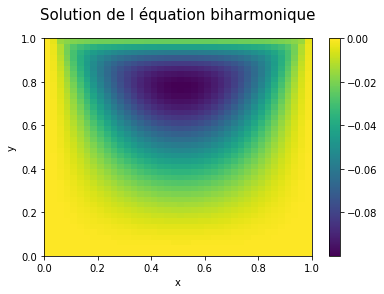

In [29]:
fig, ax = plt.subplots()

x = np.linspace(0,l,nx)
y = np.linspace(0,h,ny)
X,Y = np.meshgrid(x,y)
Z = biharmonic_conjugate_gradient(m_0, b, dx, dy, maxiter=20000, rtol=1e-8)[0]

print(" nombre d'itérations:",biharmonic_conjugate_gradient(m_0, b, dx, dy, maxiter=20000, rtol=1e-8)[1])

pyplot.title('Solution de l équation biharmonique', fontsize = 15, x = 0.5, y = 1.06)
pyplot.xlabel('x')
pyplot.ylabel('y')

color = ax.pcolor(X,Y,Z)
cp = fig.colorbar(color);

### Plot contour

Text(0,0.5,'Y')

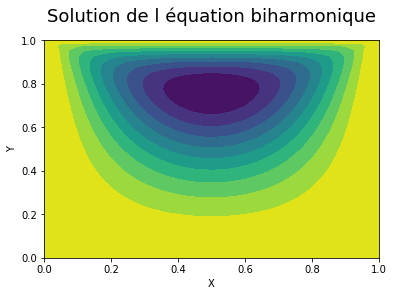

In [40]:
cc = fig.colorbar(plt.contourf(X,Y,Z, 11, cmap = cm.viridis));

pyplot.title('Solution de l équation biharmonique',fontsize = 18, x = 0.5, y = 1.06)
pyplot.xlabel('X')
pyplot.ylabel('Y')


## 5. Évaluation de la solution à l'équation biharmonique en les points demandés.

Quelle est la valeur de la fonction du courant aux points suivants: (0.6,0.2), (0.6,0.4), (0.6,0.6), (0.6,0.8) ?

D'abord, nous calculons les coordonnées telles que la fonction est évaluée aux points demandés sachant que nx = ny = 41:

$\frac{1}{40}= a$ pour x et y.

donc les coordonnées seront :

• pour le premier point $0.6/a = 24$ en x et $0.2/a = 8$ en y 

• pour le deuxième point $0.6/a = 24$ en x et $0.4/a = 16$ en y 

• pour le troisième point $0.6/a = 24$ en x et $0.6/a = 24$ en y 

• pour le quatrième point $0.6/a = 24$ en x et $0.8/a = 32$ en y 

In [13]:
print('La valeur de la fonction du courant au point (0.6,0.2) est : {0:f}'.format(Z[8,24]))
print('La valeur de la fonction du courant au point (0.6,0.4) est : {0:f}'.format(Z[16,24]))
print('La valeur de la fonction du courant au point (0.6,0.6) est : {0:f}'.format(Z[24,24]))
print('La valeur de la fonction du courant au point (0.6,0.8) est : {0:f}'.format(Z[32,24]))

La valeur de la fonction du courant au point (0.6,0.2) est : -0.010040
La valeur de la fonction du courant au point (0.6,0.4) est : -0.036163
La valeur de la fonction du courant au point (0.6,0.6) est : -0.073817
La valeur de la fonction du courant au point (0.6,0.8) est : -0.094484


Visualisons mieux la solution au problème avec un graphique en 3D, nous allons avoir besoin de la définition qui se trouve dans le fichier $\bf helper.py$ (fonctions-aide pour les lessons 05_relax du Numerical-MOOC)

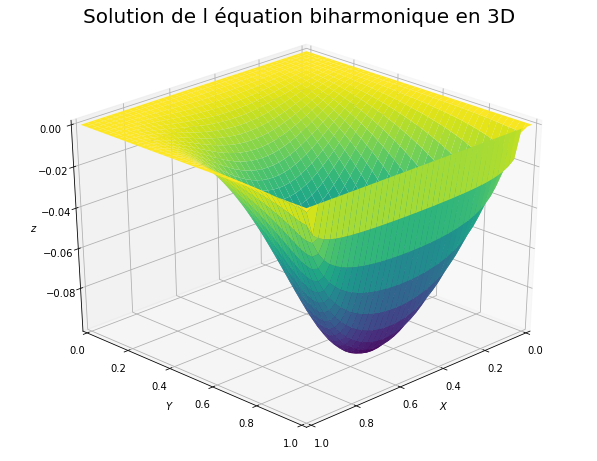

In [41]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    """
    Creates a Matplotlib figure with a 3D surface plot of the scalar field p.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    p : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction;
        default: 'z'.
    elev : float, optional
        Elevation angle in the z plane;
        default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane;
        default: 45.0.
    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel(label)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)
    pyplot.title('Solution de l équation biharmonique en 3D',fontsize = 20, x = 0.5, y = 1.06)
    
plot_3d(x,y,Z)

## 6. Références

[Site Web] Wikipedia - Biharmonic equation https://en.wikipedia.org/wiki/Biharmonic_equation

[Notebook] B. Knaepen, Practical Numerical Methods with Python - lesson: 05_relax https://github.com/bknaepen/numerical-mooc/tree/MonteCarlo/lessons/05_relax

[Site Web] Wikipedia - Non-dimensionalization and scaling of the Navier–Stokes equations https://en.wikipedia.org/w/index.php?title=Non-dimensionalization_and_scaling_of_the_Navier–Stokes_equations&oldid=641860920

[Site Web] Wikipedia - Finite difference coefficient https://en.wikipedia.org/wiki/Finite_difference_coefficient

[PDF] C. Pozrikidis, Introduction to Theoretical and Computational Fluid Dynamics, Oxford University Press, 1998 http://dehesa.freeshell.org/TCFD2/tcfd2_toc.pdf

[PDF] Brian G. Higgins, 2-D Navier Stokes Solution Lid-Driven Cavity Flow, 2009

[PDF] Hendrik C. Kuhlmann and Francesco Romano, The lid-driven cavity http://www.fluid.tuwien.ac.at/HendrikKuhlmann?action=AttachFile&do=get&target=LidDrivenCavity.pdf

[PDF] P. N. Shankar and M. D. Deshpande, FLUID MECHANICS IN THE DRIVEN CAVITY, Computational and Theoretical Fluid Dynamics Division, National Aerospace Laboratories, Bangalore, India 
